In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file
# 1. Đọc dữ liệu lên dataframe
data_thietbi = pd.read_csv('thietbi.csv')
data_nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
data_nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')



In [3]:
# Data thiet bi
data_thietbi

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [4]:
# Data nguoi dung thiet bi
data_nguoidung_thietbi

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [5]:
# Data nguoi dung su dung
data_nguoidung_sudung

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [14]:
# 2. Vẽ mô hình quan hệ ERD từ bảng dữ liệu trên




In [6]:
# 3. Rename columns
data_thietbi.rename(
    columns={
        'Retail Branding': 'Branding',
        'Marketing Name': 'MarketingName'},
        inplace=True
)
data_thietbi

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [7]:
# 4. Trộn bảng nguoidung_sudung va nguoidung_thietbi thong qua inner join
# Thu được bảng có các cột: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device]
dfKetQua = pd.merge(data_nguoidung_sudung, data_nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
dfKetQua

# Cách 2: Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua left join
# dfKetQua2 = pd.merge(data_nguoidung_sudung, data_nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')
# dfKetQua2



,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
154,198.59,90.49,5191.12,23043,android,SM-G900F
155,198.59,90.49,3114.67,23044,android,SM-G900F
156,106.65,82.13,5191.12,23046,android,Moto G (4)
157,344.53,20.53,519.12,23049,android,SM-G900F


In [8]:
# 5. Tiếp tục inner-join bảng thietbi và dfKetQua ở bước 4, để có thêm 2 cột Model và Branding
# Thu được bảng có các cột: [outgoing_mins_per_month, outgoing_sms_per_month,
# monthly_mb, use_id, platform, device, Model, Branding]
# Không lặp lại cột Model, Branding
# Cach1: inner join
dfKetQua = pd.merge(
    dfKetQua, data_thietbi[['Branding', 'Model']],
    left_on='device',
    right_on='Model'
)
dfKetQua


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505
...,...,...,...,...,...,...,...,...
196,22.85,34.54,6577.12,23029,android,HTC One_M8,HTC,HTC One_M8
197,180.18,17.49,2076.45,23039,android,SM-G531F,Samsung,SM-G531F
198,12.85,58.32,74.40,23040,android,HTC Desire 620,HTC,HTC Desire 620
199,42.75,46.83,5191.12,23053,android,Vodafone Smart ultra 6,Vodafone,Vodafone Smart ultra 6


In [9]:
# 6. Liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng chữ 'GT'
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [10]:
# 7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
# sử dụng của các nhãn hàng 

dfKetQua.groupby('Branding').agg(
    {
        'outgoing_mins_per_month': 'mean',
        'outgoing_sms_per_month': 'mean',
        'monthly_mb': 'mean',
        'use_id': 'count'
    }
)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


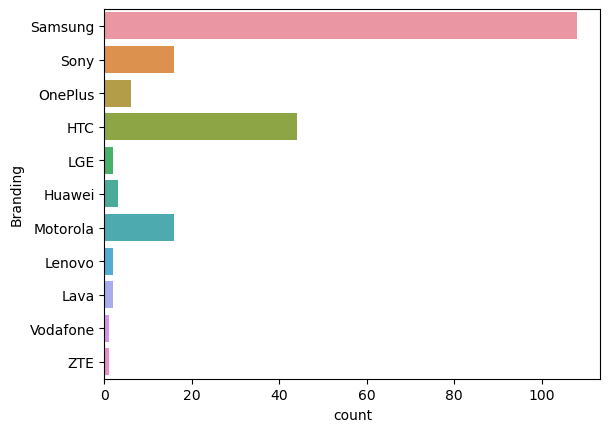

In [11]:
# 8. Trực quan số lượng người dùng các nhãn hàng
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8088\2753771651.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, ci=None)


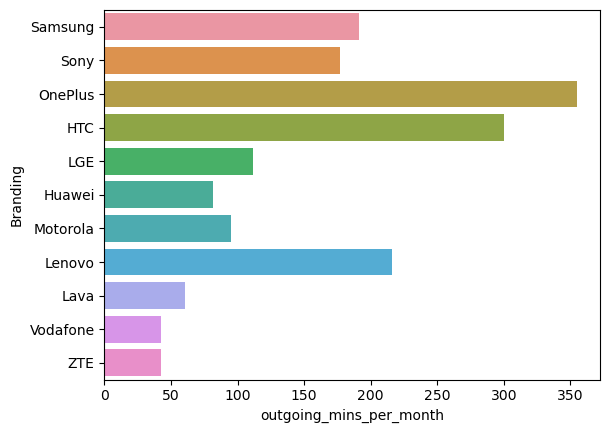

In [12]:
# 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, ci=None)
plt.show()

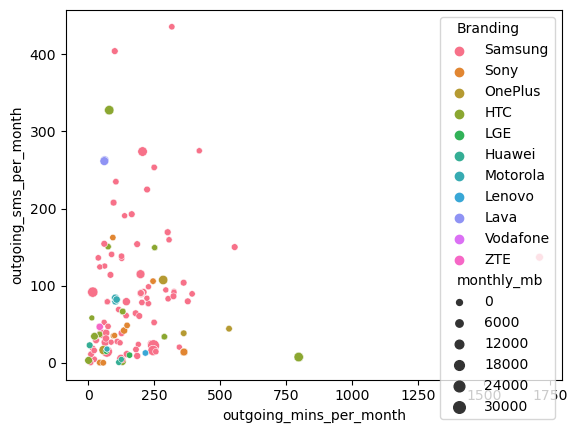

In [13]:
#10. Khảo sát tương quan giữa phút gọi, sms, dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(
    x='outgoing_mins_per_month',
    y='outgoing_sms_per_month',
    hue='Branding',
    size='monthly_mb',
    data=dfKetQua
)
plt.show()


In [17]:
# 11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
# Các bước thực hiện:
# Bước 1: Xây dựng giả thuyết:
# H0: outgoing_mins_per_month = 200
# Ha: outgoing_mins_per_month != 200
# Bước 2: Chọn mức ý nghĩa alpha = 0.05
# Bước 3: Kiểm tra điều kiện cho kiểm định
# Bước 4: Tính toán giá trị kiểm định
# Bước 5: Đưa ra quyết định
from scipy import stats
alpha = 0.05
outgoing_mins = dfKetQua['outgoing_mins_per_month']
t, p = stats.ttest_1samp(outgoing_mins, 200)
print('t =', t, ', p =', p)
if p < alpha:
    print('Có bằng chứng để bác bỏ giả thuyết H0')
else:
    print('Chưa có bằng chứng để bác bỏ giả thuyết H0, outgoing_mins_per_month = 200')



t = 0.3678324474067915 , p = 0.7133871524810331
Chưa có bằng chứng để bác bỏ giả thuyết H0, outgoing_mins_per_month = 200


In [15]:
# 12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
# Các bước thực hiện:
# Bước 1: Xây dựng giả thuyết:
    # H0: outgoing_sms_per_month = 100
    # Ha: outgoing_sms_per_month != 100
# Bước 2: Chọn mức ý nghĩa alpha = 0.05
# Bước 3: Kiểm tra điều kiện cho kiểm định
# Bước 4: Tính toán giá trị kiểm định
# Bước 5: Đưa ra quyết định
alpha = 0.05
outgoing_sms = dfKetQua['outgoing_sms_per_month']
t, p = stats.ttest_1samp(outgoing_sms, 100)
print('t =', t, ', p =', p)
if p < alpha:
    print('Bác bỏ giả thuyết H0, outgoing_sms_per_month != 100')
else:
    print('Chưa có bằng chứng để bác bỏ giả thuyết H0')

t = -2.956708578196125 , p = 0.0034834938502051878
Bác bỏ giả thuyết H0,  outgoing_sms_per_month != 100


In [16]:
# 13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
# Các bước thực hiện:
# Bước 1: Xây dựng giả thuyết:
    # H0: monthly_mb = 2048
    # Ha: monthly_mb != 2048
# Bước 2: Chọn mức ý nghĩa alpha = 0.05
# Bước 3: Kiểm tra điều kiện cho kiểm định
# Bước 4: Tính toán giá trị kiểm định
# Bước 5: Đưa ra quyết định
alpha = 0.05
monthly_mb = dfKetQua['monthly_mb']
t, p = stats.ttest_1samp(monthly_mb, 2048)
print('t =', t, ', p =', p)
if p < alpha:
    print('Bác bỏ giả thuyết H0, monthly_mb != 2048')
else:
    print('Chưa có bằng chứng để bác bỏ giả thuyết H0')


t = 5.918078326415772 , p = 1.3950238813156428e-08
Bác bỏ giả thuyết H0, monthly_mb != 2048


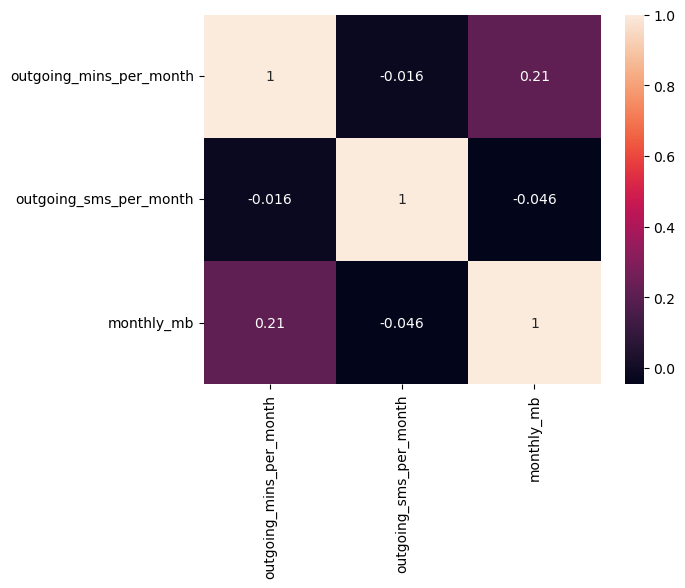

In [19]:
# #14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan
corr = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()
# corr
# ma trận tương quan
sns.heatmap(corr, annot=True)
plt.show()


In [28]:
# 15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan
# Các bước thực hiện:
# Bước 1: Xây dựng giả thuyết:
    # H0: outgoing_mins_per_month và outgoing_sms_per_month không tương quan
    # Ha: outgoing_mins_per_month và outgoing_sms_per_month tương quan
from scipy.stats.stats import pearsonr
# Dựa trên pvalue
sta, pvalue = pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])
if pvalue < 0.05:
    print('Ket Luan: outgoing_mins_per_month và outgoing_sms_per_month tương quan')
else:
    print('Ket Luan: outgoing_mins_per_month và outgoing_sms_per_month không tương quan')


KetLuan: outgoing_mins_per_month và outgoing_sms_per_month không tương quan


C:\Users\Admin\AppData\Local\Temp\ipykernel_8088\2409939051.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [24]:
# 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding
crosstab = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('chi2 =', chi2, ', p =', p)
if p < alpha:
    print('Có mối quan hệ giữa platform và branding')
else:
    print('Không có mối quan hệ giữa platform và branding')


chi2 = 0.0 , p = 1.0
Không có mối quan hệ giữa platform và branding


In [29]:
# 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform
crosstab = pd.crosstab(dfKetQua['monthly_mb'], dfKetQua['platform'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('chi2 =', chi2, ', p =', p)
if p < alpha:
    print('Có mối quan hệ giữa monthly_mb và platform')
else:
    print('Không có mối quan hệ giữa monthly_mb và platform')
    

chi2 = 0.0 , p = 1.0
Không có mối quan hệ giữa monthly_mb và platform


In [32]:
# 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding
crosstab = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform'], dfKetQua['Branding']])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('chi2 =', chi2, ', p =', p)
if p < alpha:
    print('Có mối quan hệ giữa monthly_mb và platform theo loại branding')
else:
    print('Không có mối quan hệ giữa monthly_mb và platform theo loại branding')
    



chi2 = 544.6732898467274 , p = 2.068348390104034e-16
Có mối quan hệ giữa monthly_mb và platform theo loại branding


In [33]:
#19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
# monthly_mb dựa trên mô hình hồi quy tuyến tính
import statsmodels.api as sm
X_with_constant = sm.add_constant(dfKetQua[["outgoing_mins_per_month","outgoing_sms_per_month"]].values)
y = dfKetQua[['monthly_mb']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())


X = dfKetQua[["outgoing_mins_per_month","outgoing_sms_per_month"]].values
y = dfKetQua[['monthly_mb']].values
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sun, 08 Sep 2024   Prob (F-statistic):            0.00818
Time:                        12:22:55   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.0441    631.350      5.564      0.0

In [ ]:
# Kết quả phân tích: 
# cột x1: outgoing_mins_per_month có ảnh hưởng đến monthly_mb cao hơn so với outgoing_sms_per_month
# Cả 2 cột outgoing_mins_per_month và outgoing_sms_per_month đều có ý nghĩa với monthly_mb
# R-squared: 0.047 => 4.7% => ảnh hưởng ở mức độ nhỏ

In [35]:
# 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
# outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
# hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.
# Áp dụng công thức tính: monthly_mb = Ao + outgoing_mins_per_month * M1 + outgoing_sms_per_month * M2
# outgoing_mins_per_month = 50 phút
# outgoing_sms_per_month = 75 tin nhắn
monthly_mb = 3513.0441 + 4.8782 * 50 - 2.8500 * 75
print('monthly_mb =', round(monthly_mb,4), '(mb)')

monthly_mb = 3543.2041 (mb)
